## k-meansモデルの比較
## (sklearnライブラリ vs 手動)

---

### 1. クラスタ割当て

データ集合 $X$ とクラスタ数 $K$ が与えられたときの各点 ${x}_i$ に対して最も近い重心のインデックス $c_i$ 

$c_i = arg min_{k \in \{1, \ldots, K\}} \| \mathbf{x}_i - \boldsymbol{\mu}_k \|_2$

$\boldsymbol{\mu}_k$ はクラスタ $k$ の重心

---

### 2. 重心の更新

各クラスタの重心は、クラスタに割り当てられた点の平均ベクトルとして計算される

$\boldsymbol{\mu}_k = \frac{1}{|C_k|} \sum_{\mathbf{x}_i \in C_k} \mathbf{x}_i$

$C_k = \{ \mathbf{x}_i \mid c_i = k \}$ はクラスタ $k$ に属する点の集合

In [1]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

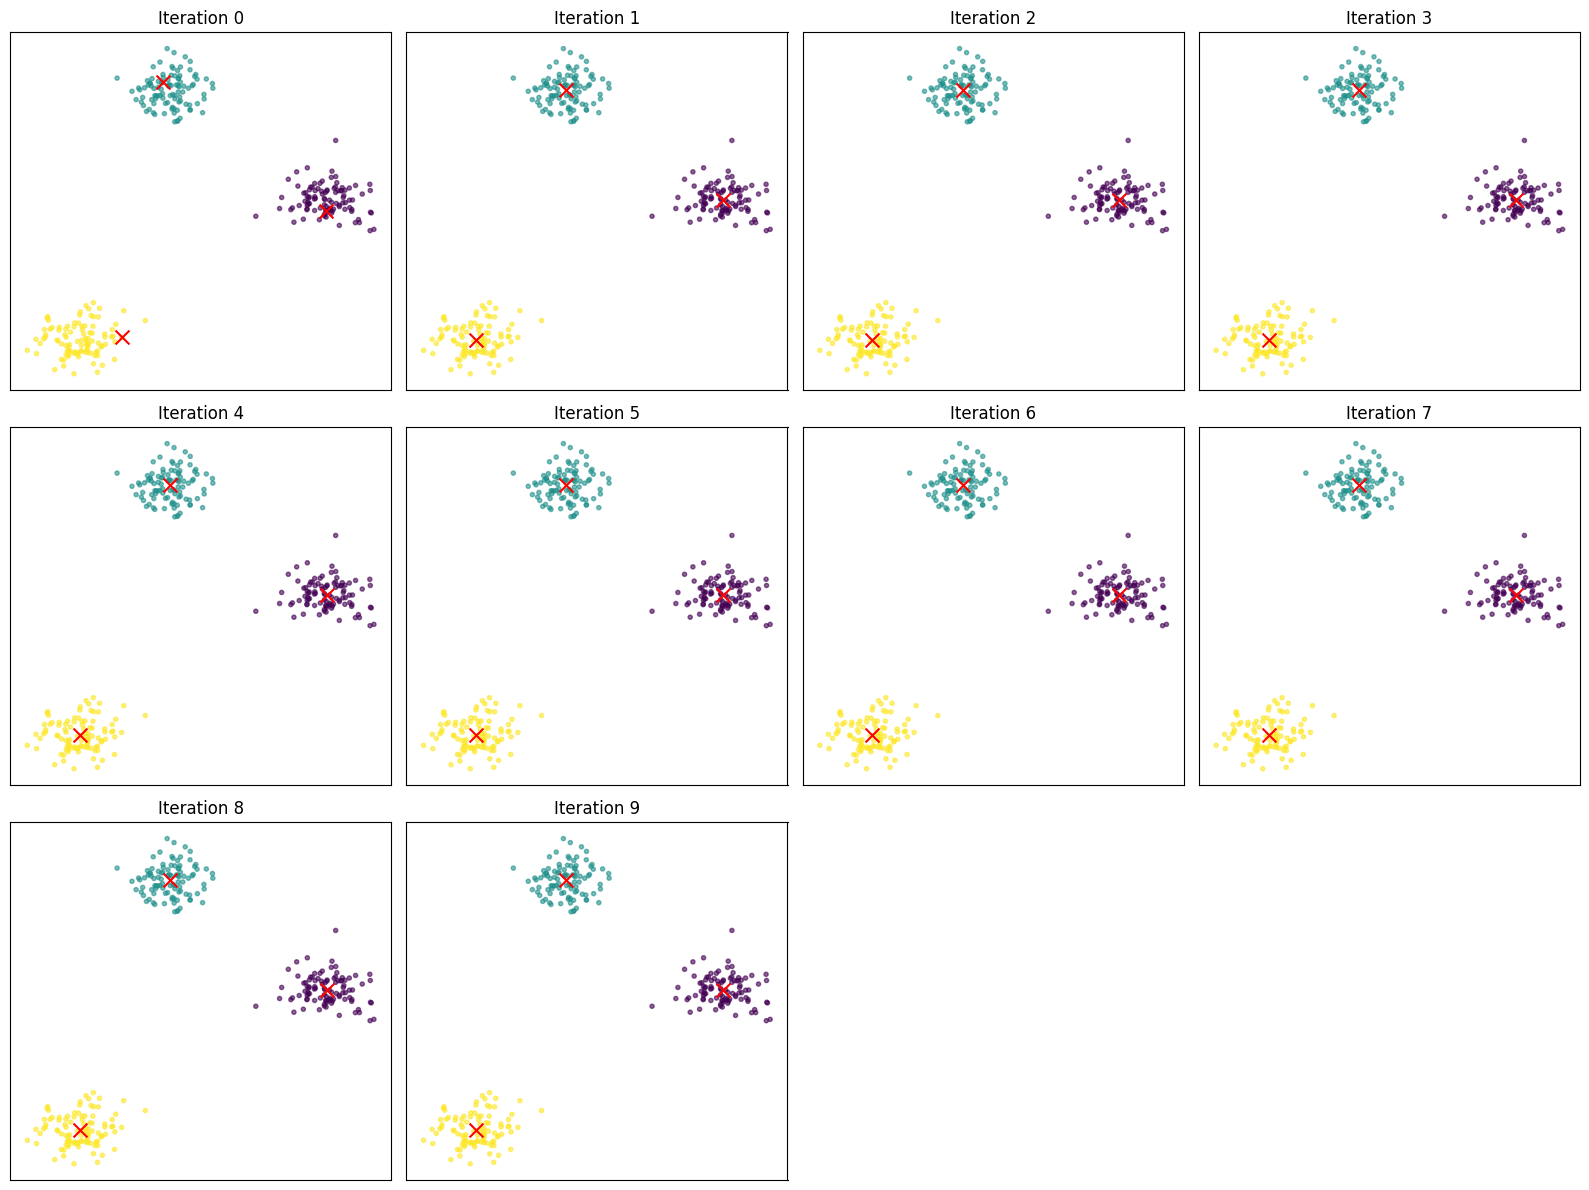

In [22]:
# 手動によるKMeans実装                                                                  

# 最も近い重心を見つける関数
def find_closest_centroids(X, centroids):
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]): 
        centroids #{=[2.0, 3.0],  [6.0, 7.0]}
        distances = np.linalg.norm(X[i] - centroids, axis=1) #各差分ベクトルのユークリッド距離を計算
        idx[i] = np.argmin(distances)#[1.414, 7.071]
    return idx

# 重心の再計算関数
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k] #X[False, True, True]
        if len(points) > 0:
            centroids[k] = np.mean(points, axis=0)#mean([[4.0, 6.0], [7.0, 8.0]])=[5.5,7.0]
        else:
            centroids[k] = np.zeros(n)  # データが割り当てられていないクラスタの処理[0,　0]
    return centroids

# 複数反復分のプロットを一枚の画像で表示する関数
def plot_progress_kMeans_all_iters(X, centroids_list, previous_centroids_list, idx_list, K):
    n_iters = len(centroids_list)
    n_rows, n_cols = 3, 4
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i in range(n_iters):
        ax = axes[i]
        centroids = centroids_list[i]
        previous_centroids = previous_centroids_list[i]
        idx = idx_list[i]

        ax.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', marker='.', alpha=0.6)
        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
        ax.set_title(f'Iteration {i}')
        ax.set_xticks([])
        ax.set_yticks([])

    for j in range(n_iters, n_rows * n_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 重心の初期化関数
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

# K-Meansの実行とプロットをまとめた関数
def run_kMeans_with_plot_all(X, initial_centroids, max_iters=10):
    K = initial_centroids.shape[0]
    centroids = initial_centroids.copy()
    centroids_list = [centroids.copy()]
    previous_centroids_list = [centroids.copy()]
    idx_list = []

    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        idx_list.append(idx.copy())
        new_centroids = compute_centroids(X, idx, K)

        previous_centroids_list.append(centroids.copy())
        centroids_list.append(new_centroids.copy())

        centroids = new_centroids

    plot_progress_kMeans_all_iters(X, centroids_list[:-1], previous_centroids_list[:-1], idx_list, K)

    return centroids, idx_list[-1]



# sklearnでクラスタリング用の2次元データを生成
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# クラスタ数
K = 3

# 初期重心の設定（ランダムにデータ点から選ぶ）
initial_centroids = kMeans_init_centroids(X, K)

# K-Meansの実行（プロットは一枚の画像にまとめて表示）
centroids, idx = run_kMeans_with_plot_all(X, initial_centroids, max_iters=10)


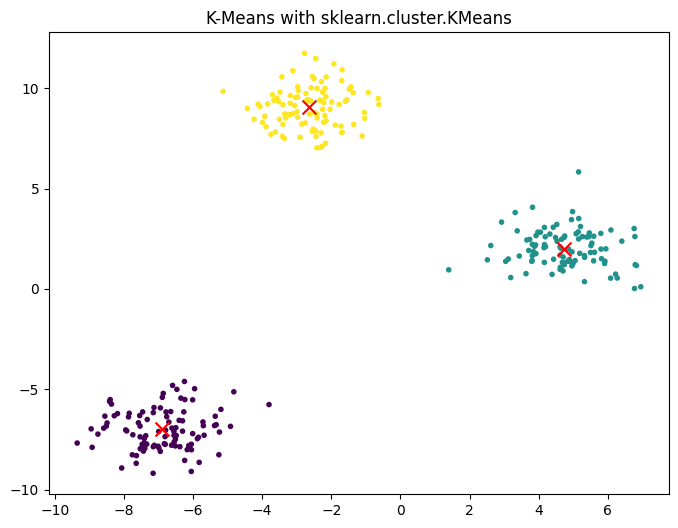

In [ ]:
# sklearnによるKMeans実装
#遠く離れた点を優先的に初期重心として選ぶように内部設定
kmeans = KMeans(n_clusters=K, max_iter=10, random_state=42)
kmeans.fit(X)

# 結果取得
centroids_sklearn = kmeans.cluster_centers_
idx_sklearn = kmeans.labels_

# 結果の可視化
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=idx_sklearn, cmap='viridis', marker='.')
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', marker='x', s=100)
plt.title('K-Means with sklearn.cluster.KMeans')
plt.show()
